In [1]:
import tensorflow as tf
import os
import glob
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from shutil import copytree, rmtree, copy
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Check TF version and whether GPU is enabled

print(tf.__version__)
print(tf.test.gpu_device_name())

2.12.0
/device:GPU:0


In [3]:
# create helper function to get dataset
dataset_url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"

In [4]:
# Helper function to download data and extract

def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    tf.keras.utils.get_file(
    'food-101.tar.gz',
    dataset_url,
    cache_subdir='/content',
    untar=True,
    )
    print("Dataset downloaded and extracted!")

In [5]:
get_data_extract()

4996278331/4996278331 [==============================] - 351s 0us/step
Dataset downloaded and extracted!


In [6]:
!ls food-101

images	license_agreement.txt  meta  README.txt


In [7]:
os.listdir('food-101/')

['README.txt', 'images', 'meta', 'license_agreement.txt']

In [8]:
#cofirming number of clases/folder names
food101_folders = len(os.listdir('food-101/images'))
print(food101_folders)

101


In [9]:
# Walk through class directory and list number of files
for dirpath, dirnames, filenames in os.walk('food-101/images'):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

There are 0 images in 'food-101/images'.
There are 1000 images in 'food-101/images/macaroni_and_cheese'.
There are 1000 images in 'food-101/images/onion_rings'.
There are 1000 images in 'food-101/images/deviled_eggs'.
There are 1000 images in 'food-101/images/macarons'.
There are 1000 images in 'food-101/images/pho'.
There are 1000 images in 'food-101/images/hot_dog'.
There are 1000 images in 'food-101/images/spaghetti_bolognese'.
There are 1000 images in 'food-101/images/chocolate_cake'.
There are 1000 images in 'food-101/images/frozen_yogurt'.
There are 1000 images in 'food-101/images/french_onion_soup'.
There are 1000 images in 'food-101/images/garlic_bread'.
There are 1000 images in 'food-101/images/cannoli'.
There are 1000 images in 'food-101/images/chicken_curry'.
There are 1000 images in 'food-101/images/chicken_wings'.
There are 1000 images in 'food-101/images/steak'.
There are 1000 images in 'food-101/images/lobster_bisque'.
There are 1000 images in 'food-101/images/fish_and_c

In [10]:
# Get all the class names (programmatically)

data_dir = pathlib.Path("food-101/images/") # turn our  path into a Python path
all_class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
#print(all_class_names)

In [11]:
random.seed(33)
all_class_names_list = list(all_class_names)
ten_class_names = random.sample(all_class_names_list, 10)
ten_class_names,len(ten_class_names)


(['panna_cotta',
  'chocolate_cake',
  'pulled_pork_sandwich',
  'cup_cakes',
  'escargots',
  'lobster_roll_sandwich',
  'red_velvet_cake',
  'onion_rings',
  'omelette',
  'churros'],
 10)

In [12]:
#cofirming the total number of images in all class
files_with_jpg_extension = len(glob.glob('food-101/images/*/*.jpg'))
print(files_with_jpg_extension)

101000


In [13]:
# Create function random_image_by_class
def random_image_by_class(class_names,rows, cols):
  fig, ax = plt.subplots(rows, cols, figsize=(25,25))
  fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
  food_id = 0
  for i in range(rows):
    for j in range(cols):
      try:
        food_selected = class_names[food_id]
        #print(food_selected)
        food_id += 1
      except:
        break
      food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
      #print(food_selected_images)
      food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
      img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
      ax[i][j].imshow(img)
      ax[i][j].set_title(food_selected, pad = 10)

  plt.setp(ax, xticks=[],yticks=[])
  plt.tight_layout()



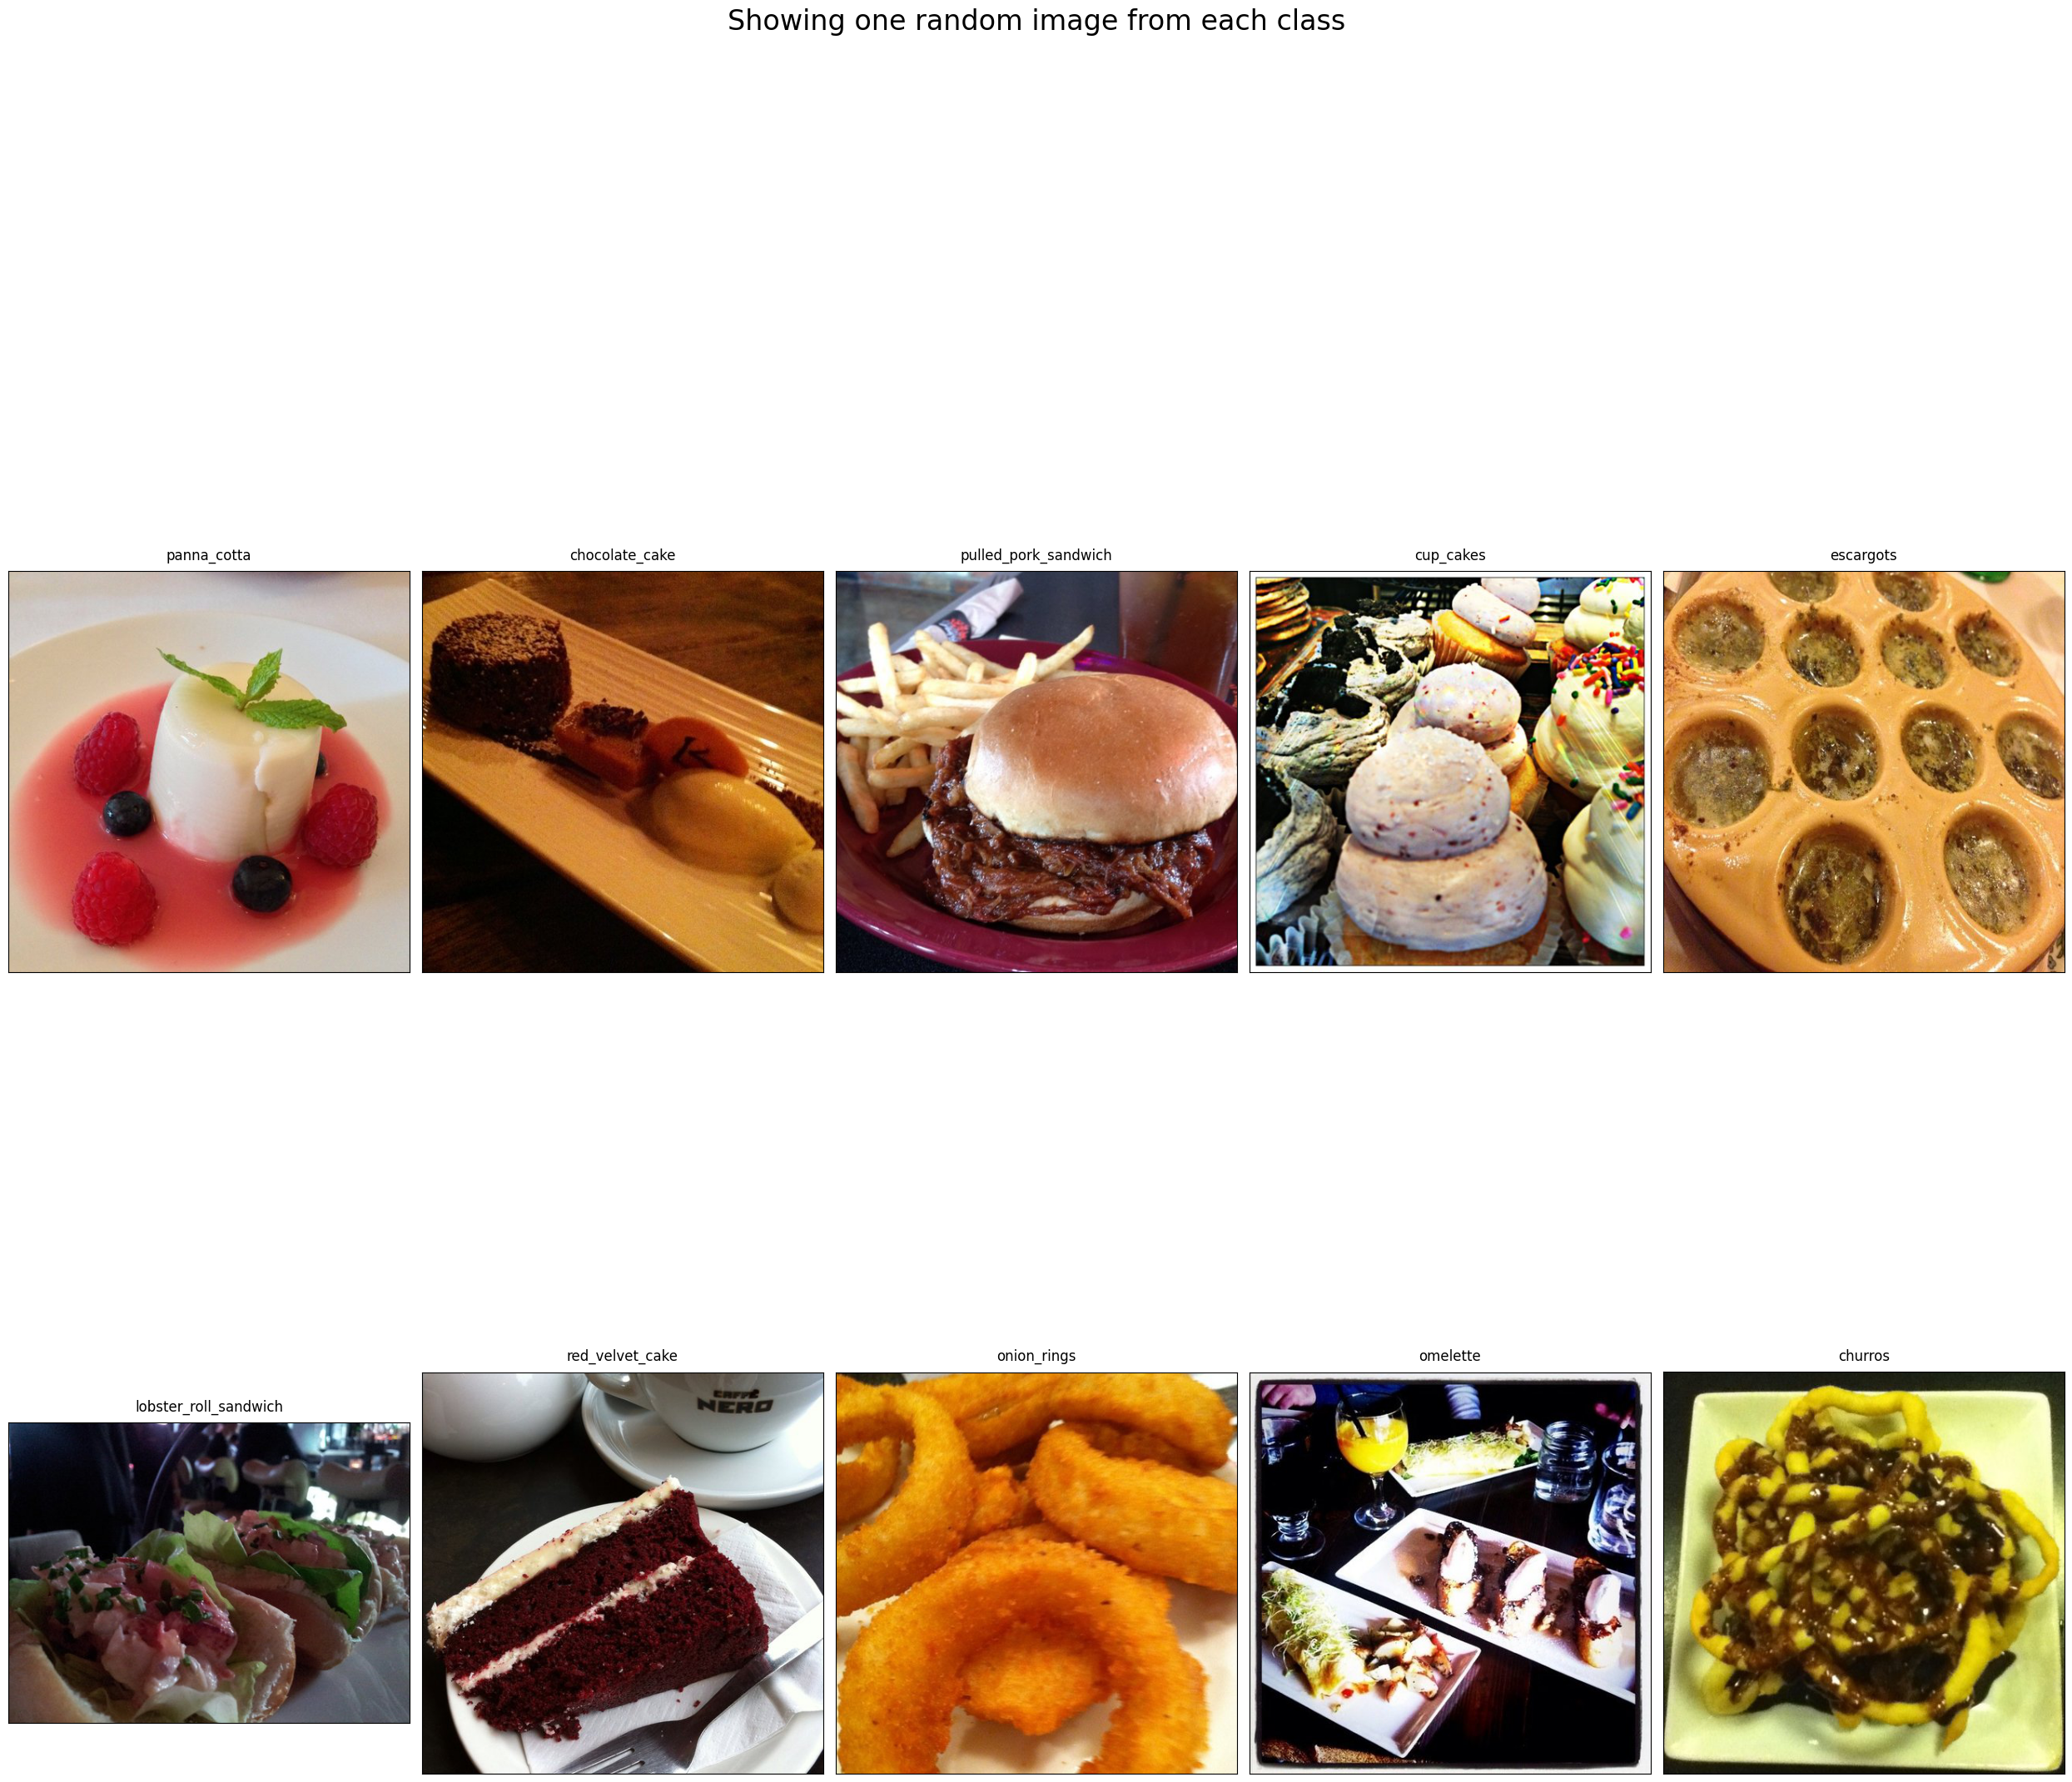

In [14]:
random_image_by_class(ten_class_names,2,5)

In [15]:
 #Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [16]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [17]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [18]:

# Check how many files are in the train folder

train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
print("Total number of samples in train folder")
print(train_files)

Total number of samples in train folder
75750


In [19]:
# Check how many files are in the test folder
test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
print("Total number of samples in test folder")
print(test_files)

Total number of samples in test folder
25250


In [20]:
#create a subset of data with just 10 clases

In [21]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [22]:
# creating new folders to store 10 classes
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [23]:
print("Creating train data folder with new classes")
dataset_mini(ten_class_names, src_train, dest_train)

Creating train data folder with new classes
Copying images into panna_cotta
Copying images into chocolate_cake
Copying images into pulled_pork_sandwich
Copying images into cup_cakes
Copying images into escargots
Copying images into lobster_roll_sandwich
Copying images into red_velvet_cake
Copying images into onion_rings
Copying images into omelette
Copying images into churros


In [24]:
print("Total number of samples in train folder")
train_files = sum([len(files) for i, j, files in os.walk("food-101/train_mini")])
print(train_files)

Total number of samples in train folder
7500


In [25]:
print("Creating test data folder with new classes")
dataset_mini(ten_class_names, src_test, dest_test)

Creating test data folder with new classes
Copying images into panna_cotta
Copying images into chocolate_cake
Copying images into pulled_pork_sandwich
Copying images into cup_cakes
Copying images into escargots
Copying images into lobster_roll_sandwich
Copying images into red_velvet_cake
Copying images into onion_rings
Copying images into omelette
Copying images into churros


In [26]:
print("Total number of samples in test folder")
test_files = sum([len(files) for i, j, files in os.walk("food-101/test_mini")])
print(test_files)

Total number of samples in test folder
2500


In [27]:
# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("food-101/test_mini"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 10 directories and 0 images in 'food-101/test_mini'.
There are 0 directories and 250 images in 'food-101/test_mini/onion_rings'.
There are 0 directories and 250 images in 'food-101/test_mini/chocolate_cake'.
There are 0 directories and 250 images in 'food-101/test_mini/lobster_roll_sandwich'.
There are 0 directories and 250 images in 'food-101/test_mini/churros'.
There are 0 directories and 250 images in 'food-101/test_mini/panna_cotta'.
There are 0 directories and 250 images in 'food-101/test_mini/escargots'.
There are 0 directories and 250 images in 'food-101/test_mini/red_velvet_cake'.
There are 0 directories and 250 images in 'food-101/test_mini/cup_cakes'.
There are 0 directories and 250 images in 'food-101/test_mini/pulled_pork_sandwich'.
There are 0 directories and 250 images in 'food-101/test_mini/omelette'.


In [28]:
train_dir = "food-101/train_mini/"
test_dir = "food-101/test_mini"

In [29]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chocolate_cake' 'churros' 'cup_cakes' 'escargots'
 'lobster_roll_sandwich' 'omelette' 'onion_rings' 'panna_cotta'
 'pulled_pork_sandwich' 'red_velvet_cake']


In [30]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


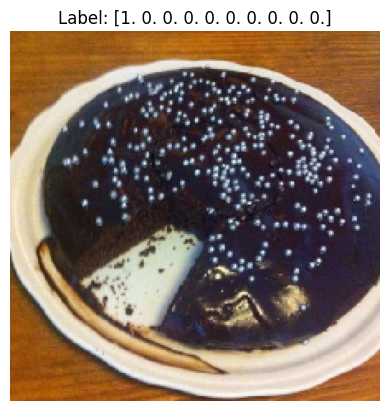

In [31]:
# Get the first batch from the test_data generator
images, labels = next(test_data)

# Extract the first image and its label
first_image = images[0]
first_label = labels[0]

# Show the first image
plt.imshow(first_image)
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()

In [35]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [38]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 229ms/step - loss: 2.0483 - accuracy: 0.2695 - val_loss: 1.8105 - val_accuracy: 0.3616
Epoch 2/5
235/235 [==============================] - 81s 345ms/step - loss: 1.6487 - accuracy: 0.4356 - val_loss: 1.7126 - val_accuracy: 0.4072
Epoch 3/5
235/235 [==============================] - 54s 229ms/step - loss: 1.3068 - accuracy: 0.5681 - val_loss: 1.7045 - val_accuracy: 0.4068
Epoch 4/5
235/235 [==============================] - 52s 223ms/step - loss: 0.9309 - accuracy: 0.7084 - val_loss: 1.9259 - val_accuracy: 0.3972
Epoch 5/5
235/235 [==============================] - 53s 226ms/step - loss: 0.5738 - accuracy: 0.8320 - val_loss: 2.1532 - val_accuracy: 0.3724


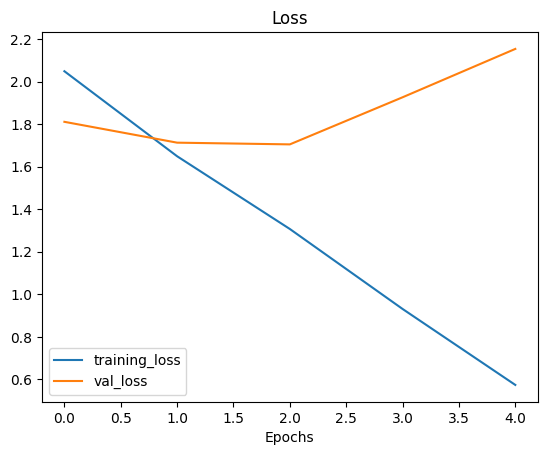

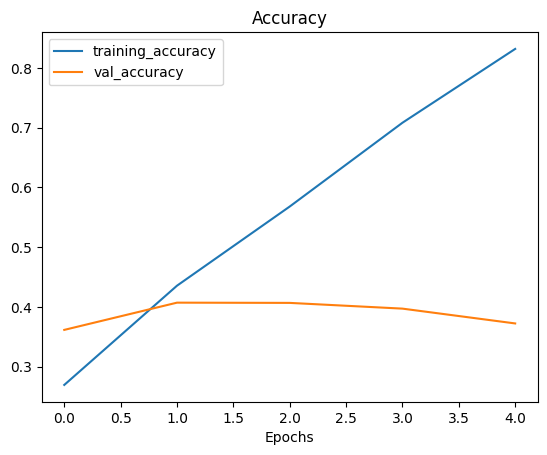

In [39]:
plot_loss_curves(history_10)

In [40]:
# try data augmentation
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [41]:
from re import L
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_10)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history_11 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=20,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 144s 602ms/step - loss: 2.1224 - accuracy: 0.2412 - val_loss: 1.8755 - val_accuracy: 0.3468
Epoch 2/5
235/235 [==============================] - 135s 574ms/step - loss: 1.9422 - accuracy: 0.3189 - val_loss: 1.7174 - val_accuracy: 0.3972
Epoch 3/5
235/235 [==============================] - 133s 564ms/step - loss: 1.8956 - accuracy: 0.3332 - val_loss: 1.6975 - val_accuracy: 0.3956
Epoch 4/5
235/235 [==============================] - 133s 569ms/step - loss: 1.8476 - accuracy: 0.3596 - val_loss: 1.6674 - val_accuracy: 0.4220
Epoch 5/5
235/235 [==============================] - 132s 563ms/step - loss: 1.8268 - accuracy: 0.3596 - val_loss: 1.6471 - val_accuracy: 0.4324


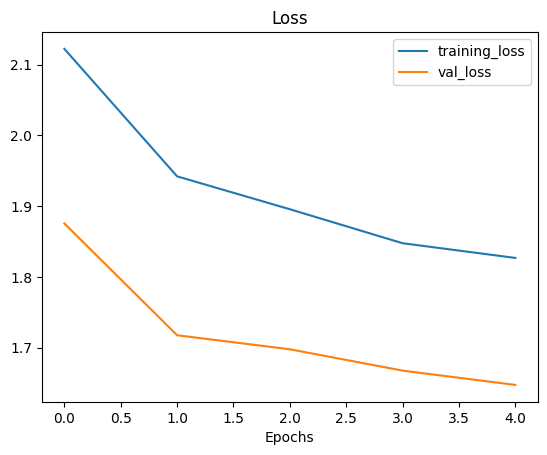

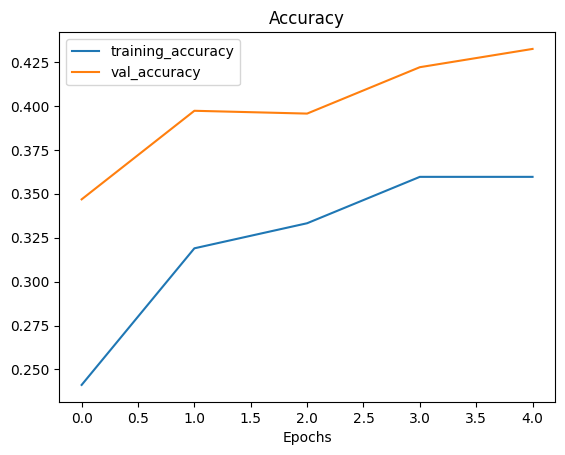

In [42]:
plot_loss_curves(history_11)

In [43]:
ten_class_names

['panna_cotta',
 'chocolate_cake',
 'pulled_pork_sandwich',
 'cup_cakes',
 'escargots',
 'lobster_roll_sandwich',
 'red_velvet_cake',
 'onion_rings',
 'omelette',
 'churros']

In [44]:

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [45]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

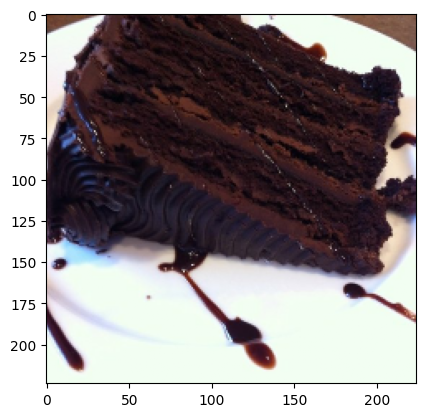

In [48]:
# Load in and preprocess our custom image
img = load_and_prep_image(\)
plt.imshow(img)

In [49]:
# Make a prediction
pred = model_3.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 172ms/step


array([[6.22867286e-01, 3.53381224e-02, 1.16265705e-02, 1.26574963e-01,
        4.69428749e-04, 3.96455219e-03, 4.58820201e-02, 9.10616107e-03,
        8.11681673e-02, 6.30026758e-02]], dtype=float32)

In [50]:
ten_class_names[pred.argmax()]

'panna_cotta'

In [51]:
test_data[0]

(array([[[[0.9803922 , 0.95294124, 0.9843138 ],
          [0.9843138 , 0.9568628 , 0.98823535],
          [0.9843138 , 0.9568628 , 0.98823535],
          ...,
          [0.7568628 , 0.64705884, 0.74509805],
          [0.7803922 , 0.67058825, 0.7686275 ],
          [0.7843138 , 0.68235296, 0.78823537]],
 
         [[0.9843138 , 0.9568628 , 0.98823535],
          [0.9843138 , 0.9568628 , 0.98823535],
          [0.9803922 , 0.95294124, 0.9843138 ],
          ...,
          [0.7411765 , 0.6313726 , 0.7294118 ],
          [0.7607844 , 0.6509804 , 0.7490196 ],
          [0.77647066, 0.6745098 , 0.7725491 ]],
 
         [[0.9843138 , 0.9568628 , 0.98823535],
          [0.9843138 , 0.9568628 , 0.98823535],
          [0.9843138 , 0.9568628 , 0.98823535],
          ...,
          [0.7294118 , 0.61960787, 0.7176471 ],
          [0.75294125, 0.6431373 , 0.7411765 ],
          [0.7725491 , 0.67058825, 0.7686275 ]],
 
         ...,
 
         [[0.98823535, 0.98823535, 0.98823535],
          [0.98823

In [52]:
predicted_label=model_3.predict(test_data)

79/79 [==============================] - 20s 249ms/step


1/1 [==============================] - 0s 23ms/step


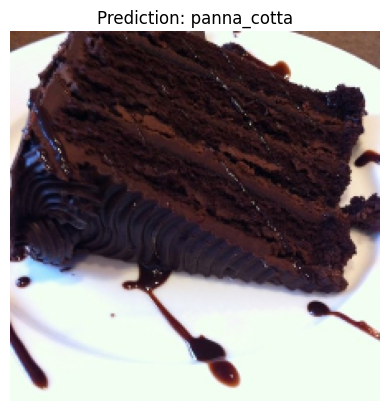

In [54]:

pred_and_plot(model_3, "/content/food-101/train_mini/chocolate_cake/1001084.jpg", ten_class_names)

In [55]:
# Save a model
model_3.save("saved_trained_model")

In [56]:
# Load in a model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 14s 177ms/step - loss: 1.6471 - accuracy: 0.4324


[1.6471225023269653, 0.4323999881744385]

In [57]:
# Compare our unsaved model's results (same as above)
model_3.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 1.6471 - accuracy: 0.4324


[1.6471222639083862, 0.4323999881744385]

In [58]:
model_3.predict(test_data)

79/79 [==============================] - 14s 170ms/step


array([[1.8881423e-02, 5.3750770e-03, 6.6580534e-02, ..., 1.9464436e-01,
        3.7214109e-03, 6.9997638e-01],
       [7.0022492e-05, 3.1076838e-06, 6.7787914e-04, ..., 8.0635948e-03,
        4.6864949e-05, 9.9112672e-01],
       [1.9537533e-02, 1.0141026e-01, 1.0986231e-02, ..., 1.6239757e-02,
        1.6780998e-01, 3.9256630e-03],
       ...,
       [7.9466686e-02, 4.0672876e-02, 1.1416696e-01, ..., 1.2844022e-01,
        1.2247128e-01, 3.7218097e-01],
       [2.1607382e-04, 1.1545028e-05, 5.1107304e-03, ..., 1.0554899e-01,
        6.0085480e-05, 8.8896000e-01],
       [2.9383135e-01, 4.3355517e-02, 5.3257234e-02, ..., 1.1374069e-02,
        1.5970677e-01, 9.8814048e-02]], dtype=float32)

79/79 [==============================] - 13s 167ms/step


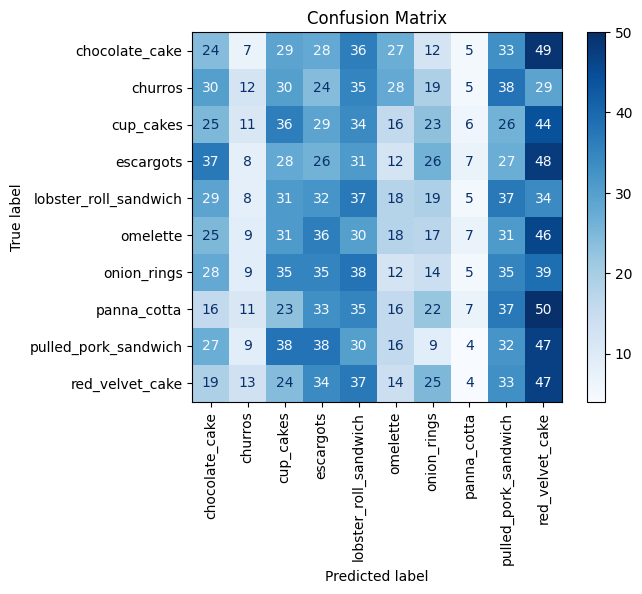

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Assuming you have a trained model called 'model'

# Step 2: Retrieve true labels from the test_data generator
true_labels = test_data.classes

# Step 3: Use the model to predict labels for the test data
predicted_labels = np.argmax(model_3.predict(test_data), axis=-1)

# Step 4: Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix as a heatmap
class_names = list(test_data.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()


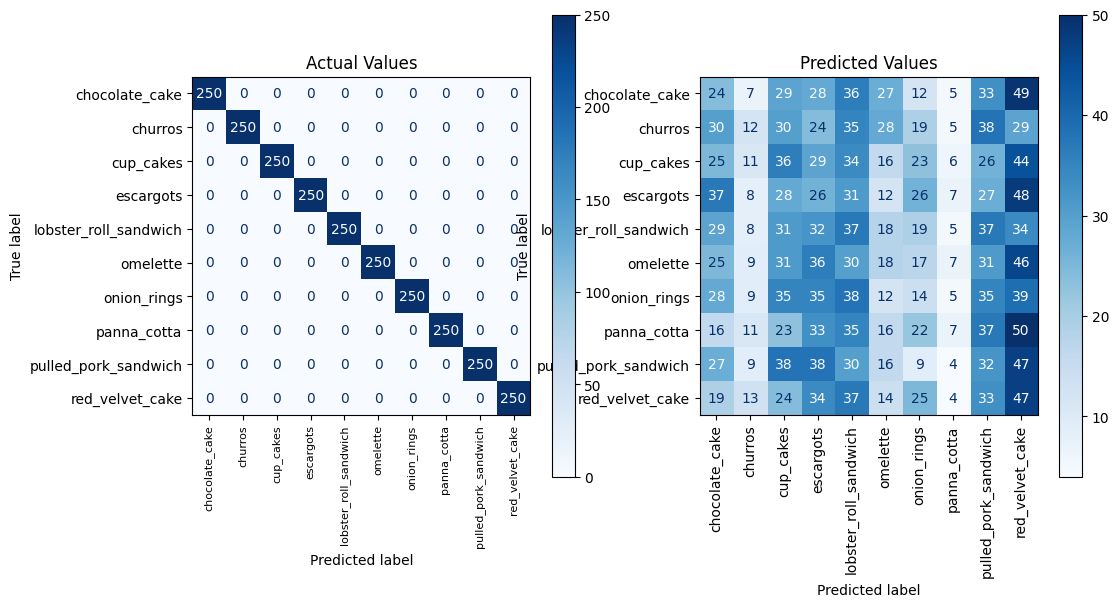

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the true_labels and predicted_labels as calculated in the previous code.

# Create the confusion matrix for actual values
cm_actual = confusion_matrix(true_labels, true_labels)
disp_actual = ConfusionMatrixDisplay(confusion_matrix=cm_actual, display_labels=class_names)

# Create the confusion matrix for predicted values
cm_predicted = confusion_matrix(true_labels, predicted_labels)
disp_predicted = ConfusionMatrixDisplay(confusion_matrix=cm_predicted, display_labels=class_names)

# Create subplots to display the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the confusion matrix with actual values
disp_actual.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[0])
axes[0].set_title("Actual Values")
#axes[0].tick_params(axis='both', which='both', labelrotation=90)  # Rotate x and y tick labels
axes[0].tick_params(axis='x', labelrotation=90)
disp_actual.ax_.set_xticklabels(disp_actual.ax_.get_xticklabels(), fontsize=8)  # Reduce label


# Plot the confusion matrix with predicted values
disp_predicted.plot(cmap=plt.cm.Blues, values_format='d', ax=axes[1])
axes[1].set_title("Predicted Values")
#axes[1].tick_params(axis='both', which='both', labelrotation=90)  # Rotate x and y tick labels
axes[1].tick_params(axis='x', labelrotation=90)
disp_actual.ax_.set_xticklabels(disp_actual.ax_.get_xticklabels(), fontsize=8)  # Reduce label

plt.show()


1/1 [==============================] - 0s 31ms/step


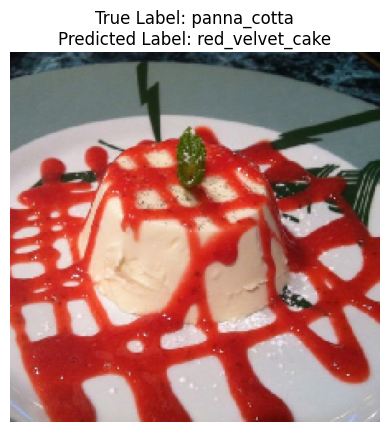

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Assuming you have the true_labels and predicted_labels as calculated in the previous code.

# Get the first batch from the test_data generator
images, labels = next(test_data)

# Choose an index (e.g., 0) to select a sample image and its corresponding label
sample_index = 0
sample_image = images[sample_index]
true_label = class_names[np.argmax(labels[sample_index])]  # Convert one-hot encoded label to class name

# Use the model to predict the label for the sample image
sample_image_array = np.expand_dims(sample_image, axis=0)  # Add batch dimension to the image array
predicted_label_idx = np.argmax(model_3.predict(sample_image_array), axis=-1)[0]
predicted_label = class_names[predicted_label_idx]

# Display the sample image and its corresponding predicted label
plt.imshow(sample_image)
plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
plt.axis('off')
plt.show()
